# Implementing Statistics with Functions - Exercise

## Introduction 
In this lab you'll dive deep into calculating the measures of central tendency and dispersion introduced in previous lessons. You will code the formulas for these functions in Python which will require you to use the programming skills that you have gained in the other sections of this module. Let's get started!

## Objectives

You will be able to:
- Create functions to model measures of central tendency and dispersion
- Perform basic statistical analysis of given data using measures of central tendency and dispersion 

## Dataset

For this lab, we'll use the [NHIS dataset](http://people.ucsc.edu/~cdobkin/NHIS%202007%20data.csv), which contains weights, heights, and some other attributes for a number of surveyed individuals. The context of this survey is outside the scope this lab, so we'll just go ahead and load the heights column as a list for us to run some simple statistical experiments. We'll use the `pandas` library to import the data into our Python environment. This process will be covered in detail in the next section. For now, we'll do this part for you to give you a head start.  

Run the cell below to import the data. 

In [2]:
import pandas as pd
df = pd.read_csv('../data/NHIS 2007 data.csv')
df.head()

,HHX,FMX,FPX,SEX,BMI,SLEEP,educ,height,weight
0,16,1,2,1,33.36,8,16,74,260
1,20,1,1,1,26.54,7,14,70,185
2,69,1,2,2,32.13,7,9,61,170
3,87,1,1,1,26.62,8,14,68,175
4,88,1,1,2,27.13,8,13,66,168


In [3]:
height = list(df['height'])

We are only interested in the height column, so we saved it as a list in the variable `height` in the cell above. 

In the cell below:

* Print out the number of items in `height`

In [4]:
len(height)

4785

* Slice and print out the first 10 items from `height`

In [8]:
print(height[:10])

[74, 70, 61, 68, 66, 98, 99, 70, 65, 64]


So, around 4700 records of height. That's great. Next, we'll try plotting some basic **_Histograms_** for these records. 

## Plotting Histograms

We'll begin by importing the `pyplot` module from the library `matplotlib` and setting an alias of `plt` for it (so that we only have to type `plt.` instead of `matplotlib.pyplot.` each time we want to use it).  Note that `plt` is considered the **_Standard Alias_** for matplotlib.

Run the cell below to import matplotlib and use it to create a histogram of our `height` data with 8 different bins. 

# Import matplotlib and plot histogram for height data

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline  

+ Next, we'll use matplotlib to create a histogram by passing in our data, as well as the parameter `bins=8`.

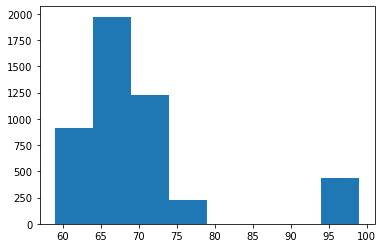

In [7]:
plt.hist(height, bins=8)
plt.show()

Do you spot anything unusual above? Some outliers, maybe?

**We shall discuss outliers later in more details**

## Measures of Central Tendency: Calculating the Mean

We're just beginning to dig into the data stored in `height`. We'll begin by writing a function to calculate the mean of the data.  Recall the formula for calculating mean:

$$ \Large \bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i $$

Using the Python skills you have learned so far, create a function `get_mean()` to perform the following tasks: 
* Input a list of numbers (like the height list we have above)
* Calculate the sum of numbers and length of the list 
* Calculate mean from above, round off to 2 decimals and return it.

In [9]:
def mean(x):
    mean = sum(x)/len(x)
    return mean

In [13]:
list_one = [5,4,3,2,1]
list_two = [4,2,3,1]

In [11]:
mean(list_one)

3.0

In [14]:
mean(list_two)

2.5

# Now let's test the function by passing in the height list

In [18]:
import numpy as np

In [21]:
mean(height)

69.57826541274817

In [20]:
np.round(mean(height),2)

69.58

So, we have our mean length, 69.58, and this confirms our observations from the histogram. But we also have some outliers in our data above and we know outliers affect the mean calculation by pulling the mean value in their direction. So, let's remove these outliers and create a new list to see if our mean shifts or stays. We'll use a threshold of 80 inches, i.e. filter out any values greater than 80. 
 
Perform following tasks:

* Create a function `filter_list()` that inputs a list 
* Perform a for loop to iteratively check and append values to a new list if the value is less than 80 
* Return the new list 

In [22]:
list_three = [60,70,80,90]

In [37]:
def filter_list(list_three):
    new_list = []
    for i in list_three:
        if i < 80:
            new_list.append(i)
    return new_list 

In [38]:
filter_list(list_three)

[60, 70]

Great, now we can use `filter_list()` to filter our `height` list and plot a new histogram to see if things change considerably.  

In [39]:
# Filter the height list using the above function
filtered_height = filter_list(height)

filtered_height

Now that we have filtered the outliers out of our data, let's recreate our histogram with 8 bins using our filtered data. 

**_NOTE_**: You do not need to reimport matplotlib -- once it's been imported, it's stored in memory and can be accessed whenever we like in other cells. 

Since we've filtered our data to remove outliers, we should also recalculate the mean.  Do this now in the cell below. 

# Plot a histogram for the new list - use 8 bins as before


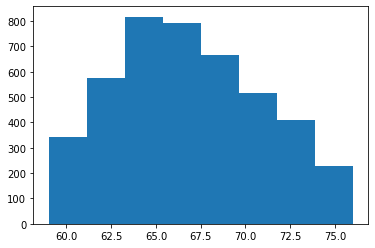

In [41]:
plt.hist(filtered_height, bins=8)
plt.show()

+ Since we've filtered our data to remove outliers, we should also recalculate the mean. Do this now in the cell below.


# Get the mean of the new filtered_height list using our get_mean() function

In [42]:
mean(filtered_height)

66.85231193926846

Does the mean height of our filtered data match up with what we see in our histogram of our filtered data?

Note that in some analytical situations we may not be able to exclude the outliers in such a naive manner. So, let's go ahead and calculate other measures of central tendency as well. We'll start by calculating the median value for our original (unfiltered) height data. 

## Calculating the Median 

The median is the value directly in the middle of the dataset. In statistical terms, this is the **_Median Quartile_**. If the dataset was sorted from lowest value to highest value, the median is the value that would be larger than the first 50% of the data, and smaller than the second 50%.

If the dataset has an odd number of values, then the median is the middle number.
If the dataset has an even number of values, then we take the mean of the middle two numbers.

In the cell below, write a function that takes in a list of numbers and returns the median value for that dataset. Make sure you first check for even / odd number of data points and perform the computation accordingly. The best approach to calculate the median is as follows:

1. Sort the data 
2. Check if the data has even or odd number of data points 
3. Calculate the median of the sorted data now that you know if the data is even or odd. 

(Hint: Recall that you can use modulo operator `%` in python to check if a value is even or odd -- odd numbers `% 2` will equal `1`, while even numbers `% 2` will equal `0`!)

In [ ]:
def get_median(x):
    x = sorted(x)
    listlength = len(x) 
    num = listlength//2
    if listlength%2==0:
        middlenum = (x[num]+x[num-1])/2
    else:
        middlenum = x[num]
    return middlenum

In [45]:
n_list = [12,57,90,20,34]

In [48]:
get_median(n_list)

34

# Calculate the median of our original height list

In [49]:
get_median(height)

67